In [1]:
%matplotlib inline


# Pyplot tutorial


An introduction to the pyplot interface.


Intro to pyplot
===============

:mod:`matplotlib.pyplot` is a collection of functions
that make matplotlib work like MATLAB.
Each ``pyplot`` function makes
some change to a figure: e.g., creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot
with labels, etc.

In :mod:`matplotlib.pyplot` various states are preserved
across function calls, so that it keeps track of things like
the current figure and plotting area, and the plotting
functions are directed to the current axes (please note that "axes" here
and in most places in the documentation refers to the *axes*
`part of a figure <figure_parts>`
and not the strict mathematical term for more than one axis).

<div class="alert alert-info"><h4>Note</h4><p>the pyplot API is generally less-flexible than the object-oriented API.
   Most of the function calls you see here can also be called as methods
   from an ``Axes`` object. We recommend browsing the tutorials and
   examples to see how this works.</p></div>

Generating visualizations with pyplot is very quick:



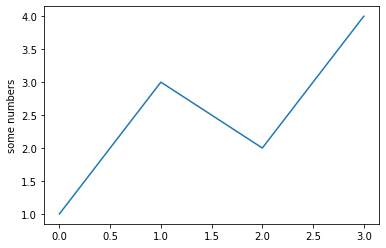

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 3, 2, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis
from 1-4.  If you provide a single list or array to
`~.pyplot.plot`, matplotlib assumes it is a
sequence of y values, and automatically generates the x values for
you.  Since python ranges start with 0, the default x vector has the
same length as y but starts with 0.  Hence the x data are
``[0, 1, 2, 3]``.

`~.pyplot.plot` is a versatile function, and will take an arbitrary number of
arguments.  For example, to plot x versus y, you can write:



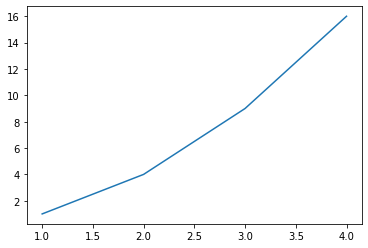

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Formatting the style of your plot
---------------------------------

For every x, y pair of arguments, there is an optional third argument
which is the format string that indicates the color and line type of
the plot.  The letters and symbols of the format string are from
MATLAB, and you concatenate a color string with a line style string.
The default format string is 'b-', which is a solid blue line.  For
example, to plot the above with red circles, you would issue



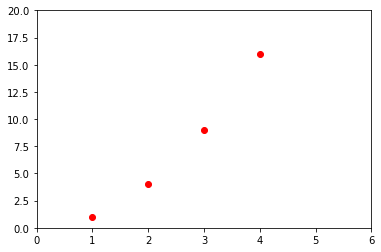

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `~.pyplot.plot` documentation for a complete
list of line styles and format strings.  The
`~.pyplot.axis` function in the example above takes a
list of ``[xmin, xmax, ymin, ymax]`` and specifies the viewport of the
axes.

If matplotlib were limited to working with lists, it would be fairly
useless for numeric processing.  Generally, you will use `numpy
<http://www.numpy.org>`_ arrays.  In fact, all sequences are
converted to numpy arrays internally.  The example below illustrates
plotting several lines with different format styles in one function call
using arrays.



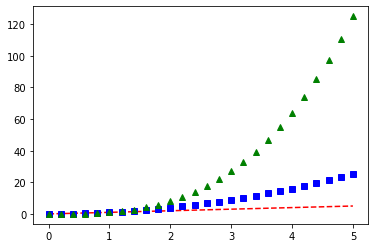

In [5]:
import numpy as np

# evenly sampled time at 200ms intervals, including endpoint
t = np.linspace(0., 5., 1 + 5*5)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

-------

*For CS114, the rest of this tutorial showcases a few of the capabilities of pyplot.  You aren't required to use these features.*

-------

Plotting with keyword strings
=============================

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



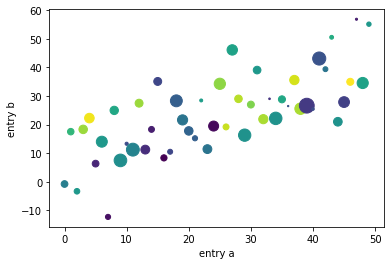

In [6]:
data = {'a': np.linspace(0, 50, endpoint=False),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


Plotting with categorical variables
===================================

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



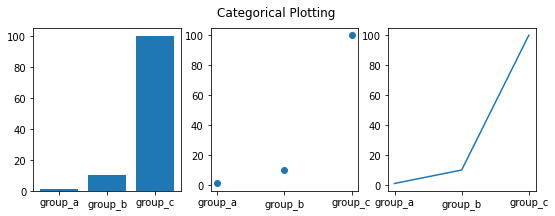

In [7]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


Controlling line properties
===========================

Lines have many attributes that you can set: linewidth, dash style,
antialiased, etc; see `matplotlib.lines.Line2D`.  There are
several ways to set line properties

* Use keyword args::

      plt.plot(x, y, linewidth=2.0)


* Use the setter methods of a ``Line2D`` instance.  ``plot`` returns a list
  of ``Line2D`` objects; e.g., ``line1, line2 = plot(x1, y1, x2, y2)``.  In the code
  below we will suppose that we have only
  one line so that the list returned is of length 1.  We use tuple unpacking with
  ``line,`` to get the first element of that list::

      line, = plt.plot(x, y, '-')
      line.set_antialiased(False) # turn off antialiasing

* Use `~.pyplot.setp`.  The example below
  uses a MATLAB-style function to set multiple properties
  on a list of lines.  ``setp`` works transparently with a list of objects
  or a single object.  You can either use python keyword arguments or
  MATLAB-style string/value pairs::

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)


Here are the available `~.lines.Line2D` properties.

======================  ==================================================
Property                Value Type
======================  ==================================================
alpha                   float
animated                [True | False]
antialiased or aa       [True | False]
clip_box                a matplotlib.transform.Bbox instance
clip_on                 [True | False]
clip_path               a Path instance and a Transform instance, a Patch
color or c              any matplotlib color
contains                the hit testing function
dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
dashes                  sequence of on/off ink in points
data                    (np.array xdata, np.array ydata)
figure                  a matplotlib.figure.Figure instance
label                   any string
linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
linewidth or lw         float value in points
marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
markeredgecolor or mec  any matplotlib color
markeredgewidth or mew  float value in points
markerfacecolor or mfc  any matplotlib color
markersize or ms        float
markevery               [ None | integer | (startind, stride) ]
picker                  used in interactive line selection
pickradius              the line pick selection radius
solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
transform               a matplotlib.transforms.Transform instance
visible                 [True | False]
xdata                   np.array
ydata                   np.array
zorder                  any number
======================  ==================================================

To get a list of settable line properties, call the
`~.pyplot.setp` function with a line or lines as argument

.. sourcecode:: ipython

    In [69]: lines = plt.plot([1, 2, 3])

    In [70]: plt.setp(lines)
      alpha: float
      animated: [True | False]
      antialiased or aa: [True | False]
      ...snip



Working with multiple figures and axes
======================================

MATLAB, and :mod:`.pyplot`, have the concept of the current figure
and the current axes.  All plotting functions apply to the current
axes.  The function `~.pyplot.gca` returns the current axes (a
`matplotlib.axes.Axes` instance), and `~.pyplot.gcf` returns the current
figure (a `matplotlib.figure.Figure` instance). Normally, you don't have to
worry about this, because it is all taken care of behind the scenes.  Below
is a script to create two subplots.

